# **New York City Hate Crime Analysis**
## by Althaf Fazil



## About the Dataset
The **NYPD Hate Crime Dataset** is a publicly available collection maintained by the New York Police Department, It is publicly available on platforms like U.S. Government's Open Data portal (https://data.gov/). It provides detailed information on hate crime incidents reported across New York City, including crime types, locations, dates, motivations, and victim characteristics. This dataset is crucial for analyzing patterns of hate crimes in the city.

A key feature of the dataset is its categorization of crimes based on motivations such as race, religion, sexual orientation, gender identity, and disability. This classification helps identify targeted groups and track trends in hate crime over time, providing insights for policymakers and advocacy groups.
et responds.



## Preliminary Wrangling




In [47]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# loading data
df = pd.read_csv('NYPD_Hate_Crimes.csv')

In [49]:
# first 5 rows
df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,2.021050e+14,2021,5,5/1/2021,50,PATROL BORO BRONX,BRONX,FELONY,BURGLARY,"BURGLARY,UNCLASSIFIED,NIGHT",ANTI-JEWISH,Religion/Religious Practice,5/1/2021,B33683676
1,2.021050e+14,2021,12,12/28/2021,50,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,9/28/2022,B34705870
2,2.022050e+14,2022,10,10/11/2022,49,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,10/11/2022,B34707656
3,2.019060e+14,2019,1,1/15/2019,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MURDER & NON-NEGL. MANSLAUGHTE,"MURDER,UNCLASSIFIED",ANTI-ASIAN,Race/Color,1/16/2019,K31675023
4,2.019070e+14,2019,2,2/8/2019,71,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-JEWISH,Religion/Religious Practice,2/8/2019,K31679592


In [50]:
# last 5 rows
df.tail()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
3250,2.024070e+14,2024,5,6/6/2024,66,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3251,2.024070e+14,2024,3,3/19/2024,68,PATROL BORO BKLYN SOUTH,KINGS,FELONY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MIS 2 & 3,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3252,2.024080e+14,2024,7,7/30/2024,84,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN
3253,2.024100e+14,2024,5,5/10/2024,104,PATROL BORO QUEENS NORTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-MUSLIM,Religion/Religious Practice,NaN,NaN
3254,2.024110e+14,2024,7,7/21/2024,107,PATROL BORO QUEENS SOUTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


In [51]:
# shape and type of data
print("Shape:",df.shape,"\n")
print(df.dtypes)

Shape: (3255, 14) 

Full Complaint ID                float64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                       object
Arrest Id                         object
dtype: object


In [52]:
# columns present
print(f'Columns: {df.columns}')

Columns: Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')


In [53]:
# null values present
print(df.isnull().sum())

Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1849
Arrest Id                        1849
dtype: int64


In [54]:
# total duplicate values present
print(df.duplicated().sum())

36


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              3255 non-null   float64
 1   Complaint Year Number          3255 non-null   int64  
 2   Month Number                   3255 non-null   int64  
 3   Record Create Date             3255 non-null   object 
 4   Complaint Precinct Code        3255 non-null   int64  
 5   Patrol Borough Name            3255 non-null   object 
 6   County                         3255 non-null   object 
 7   Law Code Category Description  3255 non-null   object 
 8   Offense Description            3255 non-null   object 
 9   PD Code Description            3255 non-null   object 
 10  Bias Motive Description        3255 non-null   object 
 11  Offense Category               3255 non-null   object 
 12  Arrest Date                    1406 non-null   o

### Data Transformation & Cleaning

In [56]:
# dropping unecessary columns
df = df.drop(columns=['Full Complaint ID','Arrest Date','Arrest Id','Offense Description','PD Code Description'])

In [57]:
df.head()

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category
0,2021,5,5/1/2021,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice
1,2021,12,12/28/2021,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice
2,2022,10,10/11/2022,49,PATROL BORO BRONX,BRONX,FELONY,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
3,2019,1,1/15/2019,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-ASIAN,Race/Color
4,2019,2,2/8/2019,71,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice


In [58]:
# changing format to datetime
df['Record Create Date'] = pd.to_datetime(df['Record Create Date'], format='mixed')

# extracting day of week from Record Create Date into a new column
df['Day'] = df['Record Create Date'].dt.strftime("%a")

# Coverting month number specified string format i.e Jan, Feb.
df['Month Number'] = pd.to_datetime(df['Month Number'],format="%m").dt.strftime('%b')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Complaint Year Number          3255 non-null   int64         
 1   Month Number                   3255 non-null   object        
 2   Record Create Date             3255 non-null   datetime64[ns]
 3   Complaint Precinct Code        3255 non-null   int64         
 4   Patrol Borough Name            3255 non-null   object        
 5   County                         3255 non-null   object        
 6   Law Code Category Description  3255 non-null   object        
 7   Bias Motive Description        3255 non-null   object        
 8   Offense Category               3255 non-null   object        
 9   Day                            3255 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 254.4+ KB


In [60]:
df['Complaint Precinct Code'] = df['Complaint Precinct Code'].astype(str)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Complaint Year Number          3255 non-null   int64         
 1   Month Number                   3255 non-null   object        
 2   Record Create Date             3255 non-null   datetime64[ns]
 3   Complaint Precinct Code        3255 non-null   object        
 4   Patrol Borough Name            3255 non-null   object        
 5   County                         3255 non-null   object        
 6   Law Code Category Description  3255 non-null   object        
 7   Bias Motive Description        3255 non-null   object        
 8   Offense Category               3255 non-null   object        
 9   Day                            3255 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 254.4+ KB


In [62]:
# Rearranging the columns
df = df[['Complaint Year Number','Month Number','Day','Record Create Date','Complaint Precinct Code',
         'Patrol Borough Name','County','Law Code Category Description','Bias Motive Description','Offense Category']]

In [63]:
df.head(1)

,Complaint Year Number,Month Number,Day,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category
0,2021,May,Sat,2021-05-01,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice


In [64]:
# Renaming Columns
df.rename({'Complaint Year Number':'Year',
          'Month Number':'Month',
          'Complaint Precinct Code':'Precinct Code',
          'Patrol Borough Name':'Patrol Borough',
          'Law Code Category Description':'Law Code Category',
          'Bias Motive Description':'Bias Motive'},axis=1,inplace=True)

In [65]:
df.head(2)

,Year,Month,Day,Record Create Date,Precinct Code,Patrol Borough,County,Law Code Category,Bias Motive,Offense Category
0,2021,May,Sat,2021-05-01,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice
1,2021,Dec,Tue,2021-12-28,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice


In [66]:
# Changing column data to something simpler for better understanding

patrolData = {'PATROL BORO MAN SOUTH':'MAN SOUTH',
              'PATROL BORO BKLYN SOUTH':'BROOKLYN SOUTH',
             'PATROL BORO BKLYN NORTH':'BROOKLYN NORTH',
             'PATROL BORO MAN NORTH':'MAN NORTH',
             'PATROL BORO QUEENS NORTH':'QUEENS NORTH',
             'PATROL BORO QUEENS SOUTH':'QUEENS SOUTH',
             'PATROL BORO BRONX':'BRONX',
             'PATROL BORO STATEN ISLAND':'STATEN ISLAND',}

df['Patrol Borough']=df['Patrol Borough'].replace(patrolData)


offenseCat = {'Religion/Religious Practice':'Religion',
             'Ethnicity/National Origin/Ancestry':'Cultural Identity'}

df['Offense Category']=df['Offense Category'].replace(offenseCat)

In [67]:
df.head()

,Year,Month,Day,Record Create Date,Precinct Code,Patrol Borough,County,Law Code Category,Bias Motive,Offense Category
0,2021,May,Sat,2021-05-01,50,BRONX,BRONX,FELONY,ANTI-JEWISH,Religion
1,2021,Dec,Tue,2021-12-28,50,BRONX,BRONX,FELONY,ANTI-JEWISH,Religion
2,2022,Oct,Tue,2022-10-11,49,BRONX,BRONX,FELONY,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
3,2019,Jan,Tue,2019-01-15,61,BROOKLYN SOUTH,KINGS,FELONY,ANTI-ASIAN,Race/Color
4,2019,Feb,Fri,2019-02-08,71,BROOKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion


In [68]:
print(df['Patrol Borough'].value_counts(),"\n")
print(df['Offense Category'].value_counts())

Patrol Borough
MAN SOUTH         749
BROOKLYN SOUTH    639
BROOKLYN NORTH    491
MAN NORTH         471
QUEENS NORTH      371
QUEENS SOUTH      212
BRONX             200
STATEN ISLAND     122
Name: count, dtype: int64 

Offense Category
Religion              1718
Race/Color             724
Sexual Orientation     466
Cultural Identity      218
Gender                 119
Unclassified             8
Disability               1
Age                      1
Name: count, dtype: int64


In [69]:
df['Patrol Borough'] = df['Patrol Borough'].str.capitalize()
df['Law Code Category'] = df['Law Code Category'].str.capitalize()
df['Bias Motive'] = df['Bias Motive'].str.capitalize()

In [70]:
df.head()

,Year,Month,Day,Record Create Date,Precinct Code,Patrol Borough,County,Law Code Category,Bias Motive,Offense Category
0,2021,May,Sat,2021-05-01,50,Bronx,BRONX,Felony,Anti-jewish,Religion
1,2021,Dec,Tue,2021-12-28,50,Bronx,BRONX,Felony,Anti-jewish,Religion
2,2022,Oct,Tue,2022-10-11,49,Bronx,BRONX,Felony,Anti-male homosexual (gay),Sexual Orientation
3,2019,Jan,Tue,2019-01-15,61,Brooklyn south,KINGS,Felony,Anti-asian,Race/Color
4,2019,Feb,Fri,2019-02-08,71,Brooklyn south,KINGS,Misdemeanor,Anti-jewish,Religion


In [71]:
print("Shape:",df.shape,"\n")
print(df.dtypes)

Shape: (3255, 10) 

Year                           int64
Month                         object
Day                           object
Record Create Date    datetime64[ns]
Precinct Code                 object
Patrol Borough                object
County                        object
Law Code Category             object
Bias Motive                   object
Offense Category              object
dtype: object


In [72]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Record Create Date    0
Precinct Code         0
Patrol Borough        0
County                0
Law Code Category     0
Bias Motive           0
Offense Category      0
dtype: int64

In [73]:
df.columns

Index(['Year', 'Month', 'Day', 'Record Create Date', 'Precinct Code',
       'Patrol Borough', 'County', 'Law Code Category', 'Bias Motive',
       'Offense Category'],
      dtype='object')

In [74]:
df.duplicated().sum()

np.int64(411)


### Structure of dataset before cleaning
 - *There are 3255 rows and 14 columns( Full Complaint ID, Complaint Year Number, Month Number,Record Create Date, Complaint Precinct Code, Patrol Borough Name, County, Law Code Category Description, Offense Description, PD Code Description, Bias Motive Description, Offense Category, Arrest Date, Arrest Id)*

 - *1849 null values in both Arrest Date and ID.*

 - *36 duplicate values*

 - *float64(1), int64(3), object(10)*


### Structure of dataset after cleaning

- *After cleaning there are 3255 rows and 10 columns(Year, Month, Day, Record Create Date, Precinct Code, Patrol Borough, County, Law Code Category, Bias Motive, Offense Category)*
  
- *0 null values*
  
- *411 duplicate values (because of addition of new column i.e Day)*
  
- *dtypes: datetime64(1), int64(1), object(8)*

### What is/are the main feature(s) of interest in your dataset?

> *Patrol Borough, Offense Category, Bais Motive*

### What features in the dataset do you think will help support your investigation into your feature interest.

>  *Month, Year, Precinct, Offense Category*



### Total Crimes Reported by Respective Patrol Boroughs

In [75]:
df['Patrol Borough'].value_counts()

Patrol Borough
Man south         749
Brooklyn south    639
Brooklyn north    491
Man north         471
Queens north      371
Queens south      212
Bronx             200
Staten island     122
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_13964\1370745105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patrol_count.index, y=patrol_count.values, palette=colors)


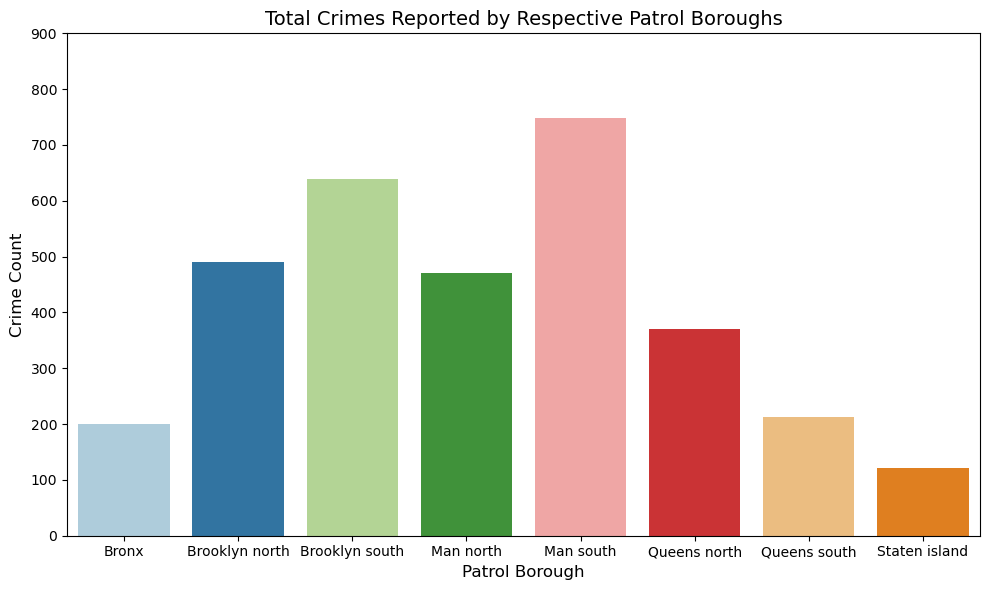

In [76]:
patrol_count = df['Patrol Borough'].value_counts().sort_index()
num_patrols = len(patrol_count)

colors = sns.color_palette("Paired", num_patrols)

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=patrol_count.index, y=patrol_count.values, palette=colors)

# Setting title and axis labels
plt.title('Total Crimes Reported by Respective Patrol Boroughs',fontsize=14)
plt.ylabel('Crime Count',fontsize=12)
plt.xlabel('Patrol Borough',fontsize=12)

# Setting max limit on y-axis
plt.ylim(0, 900)

# Plotting
plt.tight_layout()
plt.show()

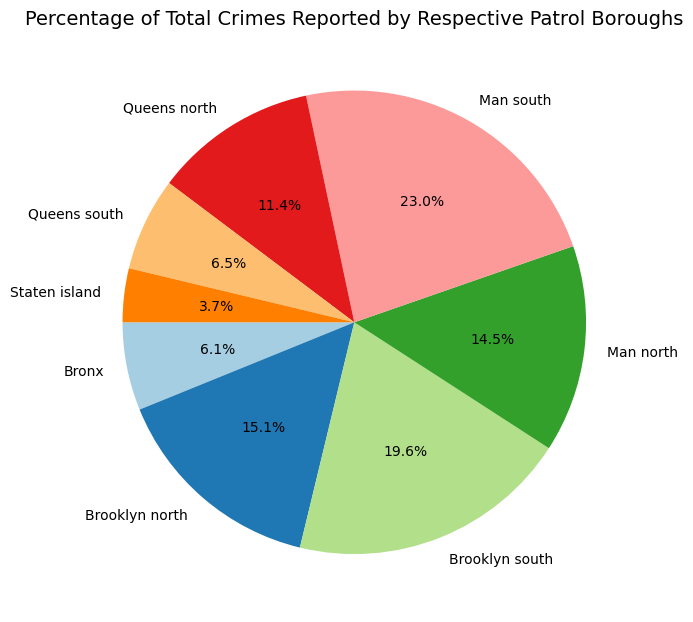

In [77]:
plt.figure(figsize=(7,7))
plt.pie(patrol_count.values,labels=patrol_count.index,autopct='%1.1f%%', startangle=180,colors=colors)
plt.title('Percentage of Total Crimes Reported by Respective Patrol Boroughs',fontsize=14)
plt.tight_layout()
plt.show()

### Top 10 Bias Motivations in Hate Crimes 

In [78]:
motive_count = df['Bias Motive'].value_counts()
top_10_motives = motive_count.head(10)
top_10_motives

Bias Motive
Anti-jewish                   1504
Anti-male homosexual (gay)     420
Anti-asian                     355
Anti-black                     257
Anti-other ethnicity           133
Anti-muslim                    121
Anti-white                     110
Anti-transgender                84
Anti-hispanic                   77
Anti-catholic                   57
Name: count, dtype: int64

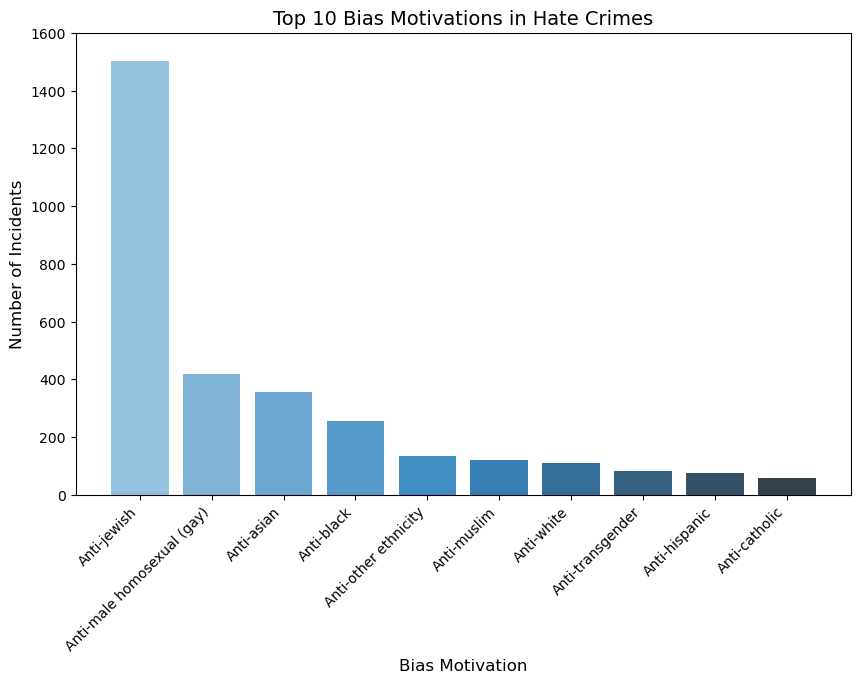

In [79]:
colors = sns.color_palette("Blues_d", len(top_10_motives))
plt.figure(figsize=(10, 6))


plt.bar(top_10_motives.index, top_10_motives.values, color=colors)
plt.title('Top 10 Bias Motivations in Hate Crimes', fontsize=14)
plt.xlabel('Bias Motivation', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.ylim(0, 1600)
plt.xticks(rotation=45, ha='right')
plt.show()


### Distribution of Crimes by Offense Category

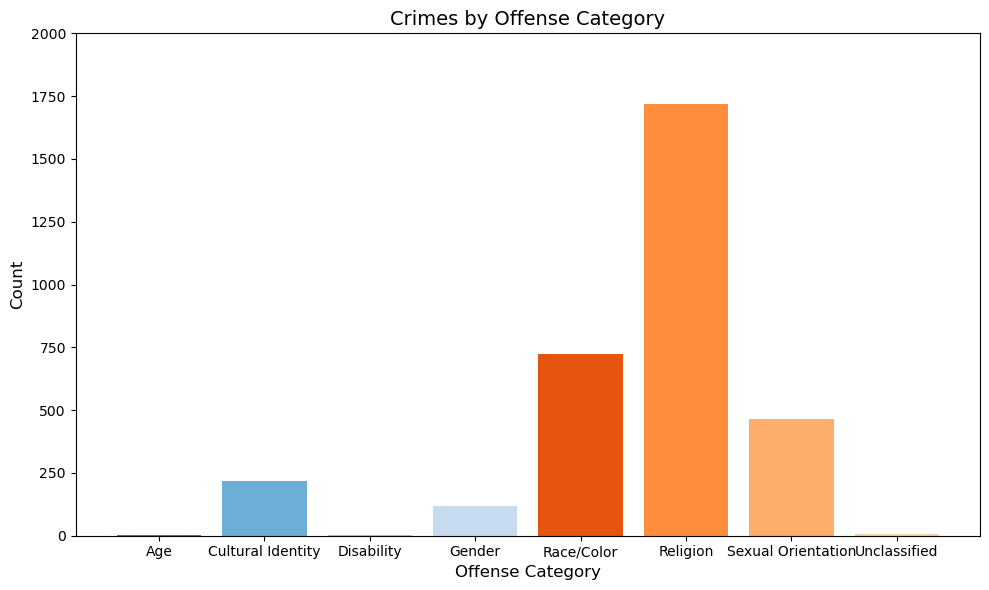

In [80]:
offense_count = df['Offense Category'].value_counts().sort_index()
colors = sns.color_palette("tab20c", len(offense_count))

plt.figure(figsize=(10, 6))
plt.bar(offense_count.index, offense_count.values, color=colors)

plt.title('Crimes by Offense Category', fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Offense Category',fontsize=12)
plt.ylim(0, 2000)


plt.tight_layout()
plt.show()

### Distribution of Crimes by County

In [81]:
df['County'].value_counts()

County
NEW YORK    1220
KINGS       1130
QUEENS       583
BRONX        200
RICHMOND     122
Name: count, dtype: int64

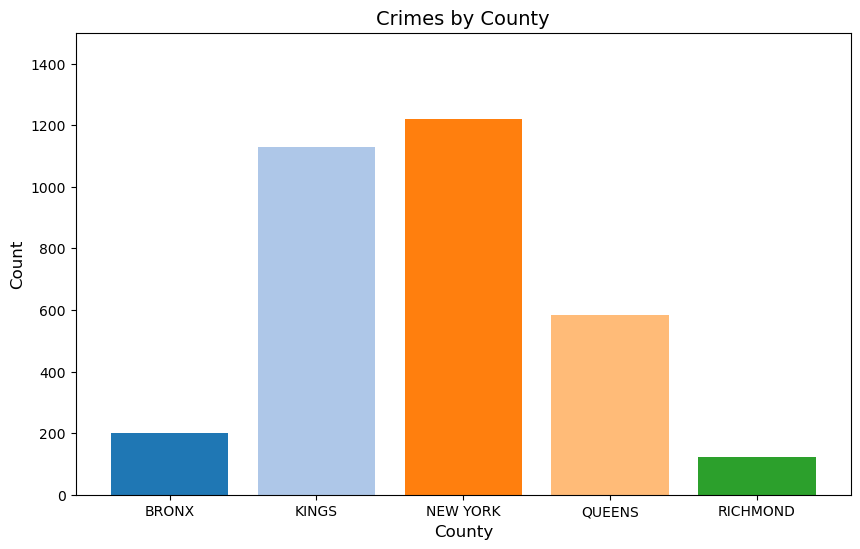

In [82]:
county_count = df['County'].value_counts().sort_index()
colors = sns.color_palette("tab20", len(county_count))

plt.figure(figsize=(10, 6))
plt.bar(county_count.index, county_count.values, color=colors)

plt.title('Crimes by County', fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('County',fontsize=12)
plt.ylim(0, 1500)


# plt.tight_layout()
plt.show()

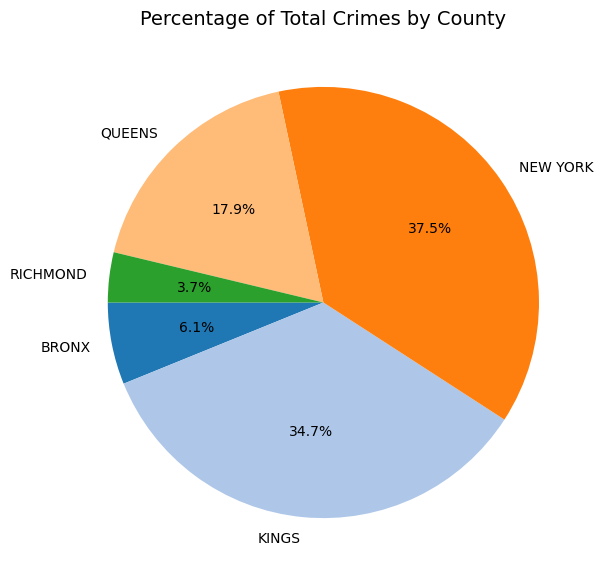

In [83]:
plt.figure(figsize=(7,7))
plt.pie(county_count.values,labels=county_count.index,autopct='%1.1f%%', startangle=180,colors=colors)
plt.title('Percentage of Total Crimes by County',fontsize=14)
# plt.tight_layout()
plt.show()

### Distribution of Crimes by Category

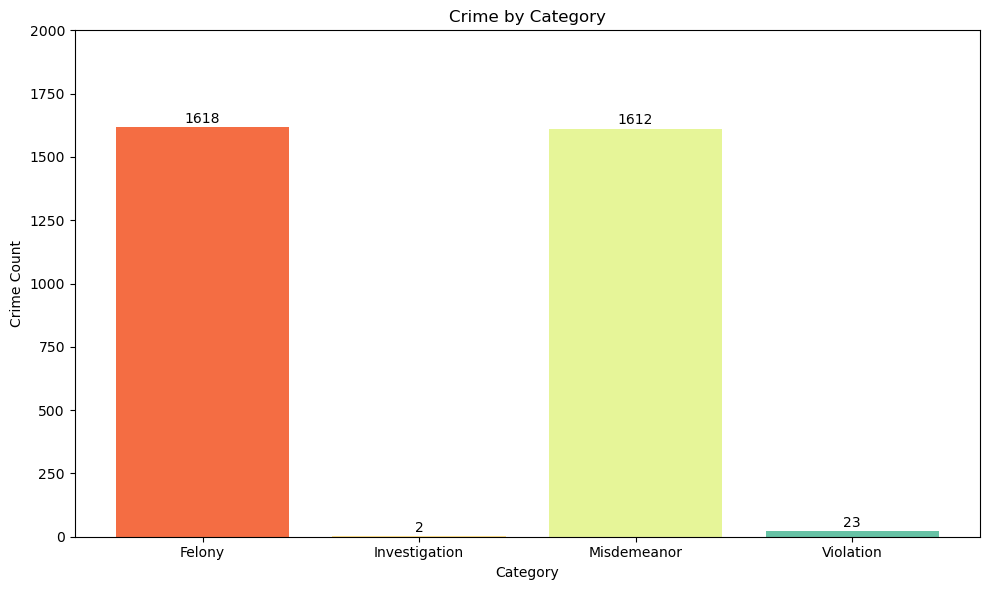

In [84]:
cat_count = df['Law Code Category'].value_counts().sort_index()
len_cat = len(cat_count)
colors = sns.color_palette("Spectral",len_cat)

plt.figure(figsize=(10,6))
bars = plt.bar(cat_count.index,cat_count.values,color=colors)

plt.title('Crime by Category')
plt.ylabel('Crime Count')
plt.xlabel('Category')
plt.ylim(0,2000)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()


### Top 5 Precincts by Crime Rate

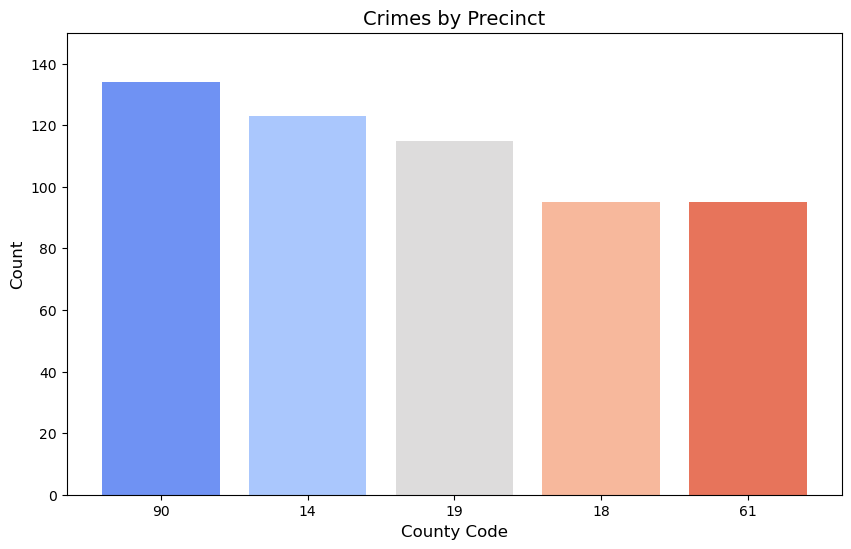

In [85]:
precinct_count = df['Precinct Code'].value_counts()
top_5_precinct = precinct_count.head()

colors = sns.color_palette("coolwarm", len(county_count))

plt.figure(figsize=(10, 6))
plt.bar(top_5_precinct.index, top_5_precinct.values, color=colors)

plt.title('Crimes by Precinct', fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('County Code',fontsize=12)
plt.ylim(0, 150)


# plt.tight_layout()
plt.show()


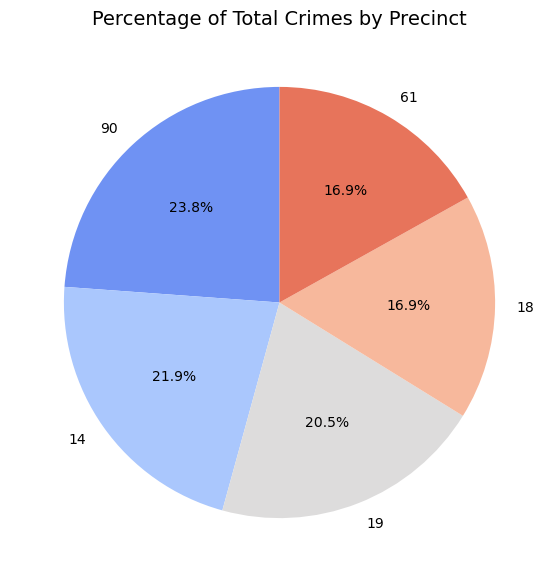

In [86]:
plt.figure(figsize=(7,7))
plt.pie(top_5_precinct.values,labels=top_5_precinct.index,autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Percentage of Total Crimes by Precinct',fontsize=14)
# plt.tight_layout()
plt.show()

### Yearly Crime Trend

In [87]:
year_count = df['Year'].value_counts().sort_index()
year_count

Year
2019    447
2020    284
2021    578
2022    672
2023    755
2024    519
Name: count, dtype: int64

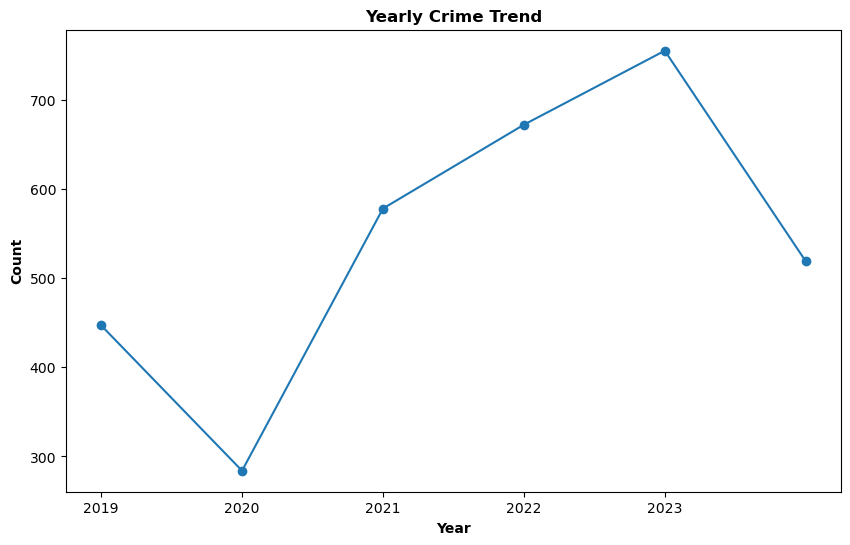

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(year_count.index, year_count.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Yearly Crime Trend', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

# specifying x-axis labels
plt.xticks([2019, 2020, 2021, 2022, 2023])

# plot
plt.show()

### Monthly Crime Trend

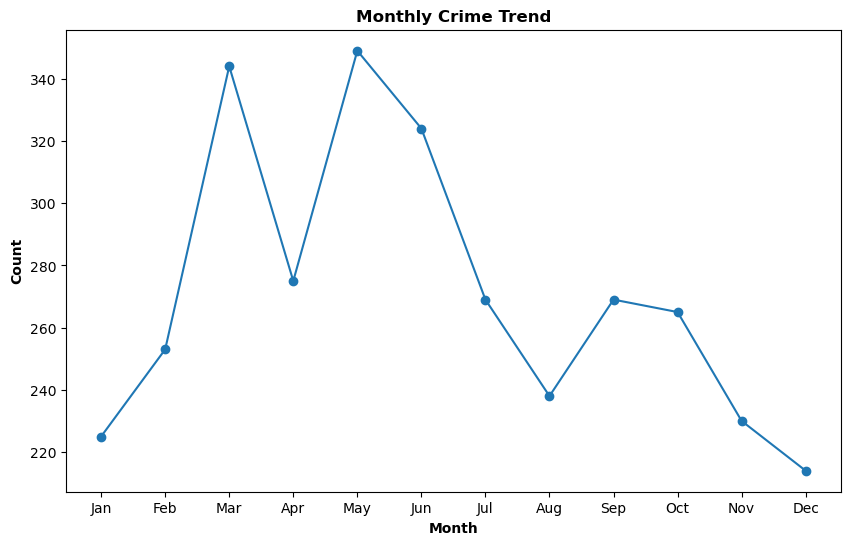

In [89]:
# sorting month in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'],categories=month_order,ordered=True)

counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(counts.index,counts.values,marker='o',linestyle='-')

plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

#  plotting
plt.show()


### Weekly Crime Trend

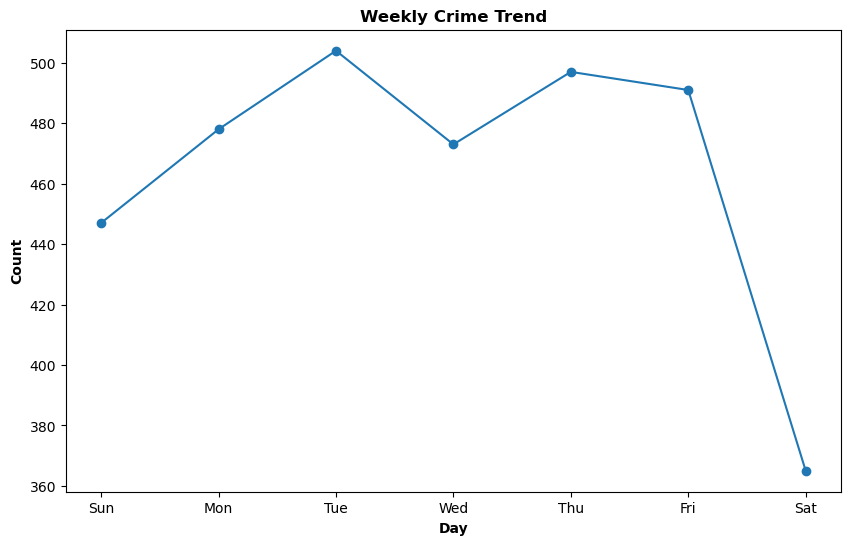

In [90]:
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# converting 'day' column to categorical with correct order
df['Day'] = pd.Categorical(df['Day'], categories = day_order, ordered=True)

# counting the occurrences of each day
counts = df['Day'].value_counts().sort_index()

# plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# title and y-axis label
plt.title('Weekly Crime Trend', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Day', fontweight='bold')

# showing the plot
plt.show()

### Monthly Crime Trend by Year

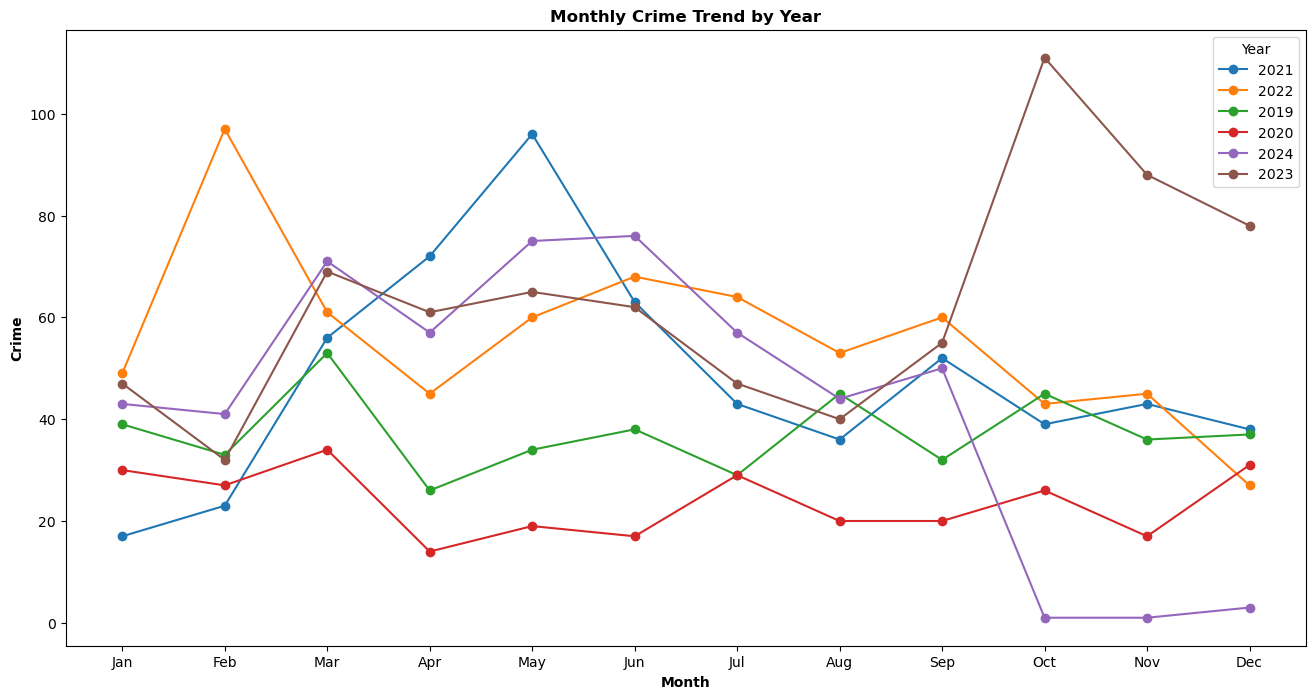

In [91]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# converting 'month' column to categorical with correct order
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

# counting the occurrences of each month
counts = df['Month'].value_counts().sort_index()

# extracting unique years from the 'year' column
unique_years = df['Year'].unique()

# plotting separate line plots for each year
plt.figure(figsize=(16, 8))
for year in unique_years:
    # data for the current year
    year_data = df[df['Year'] == year]
    
    # counting the occurrences of each month for the current year
    year_month_counts = year_data['Month'].value_counts().sort_index()
    
    # plotting the line plot for the current year
    plt.plot(year_month_counts.index, year_month_counts.values, marker='o', linestyle='-', label=str(year))

# title and axis labels
plt.title('Monthly Crime Trend by Year', fontweight='bold')
plt.ylabel('Crime', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

# adding legend
plt.legend(title='Year')

# showing the plot
plt.show()

# Project Summary

## Introduction
Hate crimes are a significant concern in urban areas, particularly in a diverse city like New York. This project aims to analyze hate crime trends in NYC using data from the NYPD. The goal is to identify patterns, understand bias motivations, and provide actionable insights for law enforcement and policymakers.

## Data Source & Collection
The analysis is based on the NYPD Hate Crime dataset, which includes:
- Reported hate crime incidents over multiple years.
- Categories of bias motivation (race, religion, gender, etc.).
- Locations (boroughs, precincts) and timestamps of reported crimes.

## Data Cleaning & Preparation
Before analysis, the data underwent preprocessing, including:
- Handling missing or inconsistent values.
- Standardizing bias motivation categories.
- Aggregating data for monthly and yearly trends.

## Exploratory Data Analysis (EDA)
Key aspects of EDA included:
- **Overall Trend Analysis**: Examining changes in hate crimes over the years.
- **Monthly and Yearly Trends**: Identifying seasonal variations and yearly spikes.
- **Bias Motivation Breakdown**: Categorizing incidents by race, religion, gender, and other factors.
- **Geospatial Analysis**: Mapping crime distribution across NYC boroughs.

## Key Insights & Findings
- Hate crimes showed **increasing trends in specific years**, possibly linked to political and social events.
- **Seasonal variations** indicate spikes during specific months, potentially linked to societal tensions.
- Certain boroughs and neighborhoods experience **higher rates of hate crimes** than others.
- Specific communities are disproportionately affected by **race- and religion-based bias crimes**.

## Predictive Analysis & Forecasting (if applicable)
If predictive modeling was applied, key findings might include:
- Identifying factors that correlate with spikes in hate crimes.
- Forecasting future crime trends using historical data and machine learning models.

## Policy Recommendations & Actionable Insights
Based on the analysis, the following recommendations are suggested:
- **Increased law enforcement presence** in high-risk areas.
- **Community outreach programs** to foster awareness and prevention.
- **Stronger reporting mechanisms** to encourage victims to report incidents.
- **Targeted policy interventions** to address specific bias motivations.

## Conclusion
The analysis provides a comprehensive view of NYPD hate crime trends. Understanding these patterns helps in crafting policies and community interventions to reduce hate crimes and promote public safety. Continued monitoring and collaboration with stakeholders are essential for long-term improvement.

---
This project serves as a valuable tool for understanding and mitigating hate crimes in NYC. Future extensions may include real-time analysis and integration with social media sentiment data for proactive intervention.

